11490434/11490434 [==============================] - 1s 0us/step
Model accuracy: 0.86


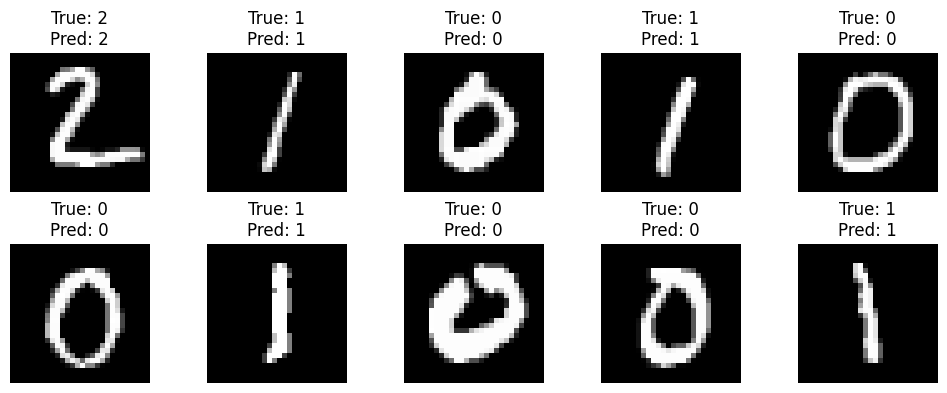

In [1]:
import numpy as np
import cv2
from keras.datasets import mnist
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Download and load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 2: Extract subset containing only digits 0, 1, and 2
def extract_subset(images, labels, digits):
    indices = np.isin(labels, digits)
    return images[indices], labels[indices]

train_images, train_labels = extract_subset(train_images, train_labels, [0, 1, 2])
test_images, test_labels = extract_subset(test_images, test_labels, [0, 1, 2])

# Step 3: Preprocess images (normalize pixel values)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 4: Calculate Hu moments for each image
def calculate_hu_moments(images):
    hu_moments = []
    for img in images:
        moments = cv2.moments(img)
        hu_moments.append(cv2.HuMoments(moments).flatten())
    return np.array(hu_moments)

train_hu_moments = calculate_hu_moments(train_images)
test_hu_moments = calculate_hu_moments(test_images)

# Step 5: Choose a machine learning model and train it
model = LogisticRegression(max_iter=1000)
model.fit(train_hu_moments, train_labels)

# Predict on the test set and calculate accuracy
predictions = model.predict(test_hu_moments)
accuracy = accuracy_score(test_labels, predictions)
print(f"Model accuracy: {accuracy:.2f}")

# Step 6: Display some images and their predicted labels
def display_predictions(images, labels, predictions, num=10):
    plt.figure(figsize=(10, 4))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Displaying 10 images and their predicted labels
display_predictions(test_images, test_labels, predictions, num=10)
